In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

In [10]:
data = load_digits()
X = data.data
y = data.target


## Learn on single Decision Tree

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [46]:
from sklearn.tree import DecisionTreeClassifier as DT

dt = DT()
scores = cross_val_score(dt, X, y, cv=10)
print(scores)
print(np.mean(scores))

with open('1.txt', 'w') as f:
    f.write(str(np.mean(scores)))

[0.78378378 0.86338798 0.79558011 0.80555556 0.7877095  0.89385475
 0.87150838 0.80337079 0.80225989 0.82386364]
0.8230874363563118


## Bagging classifier

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

In [76]:
from sklearn.ensemble import BaggingClassifier as BC


bc = BC(dt, n_estimators=100)
scores = cross_val_score(bc, X, y, cv=10)
print(scores)
print(np.mean(scores))

with open('2.txt', 'w') as f:
    f.write(str(np.mean(scores)))

[0.88108108 0.95628415 0.90607735 0.94444444 0.93296089 0.97206704
 0.96648045 0.91011236 0.86440678 0.92045455]
0.9254369091151681


Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d}$ случайных признаков. 

Качество работы получившегося классификатора - ответ в пункте 3. 

Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [77]:
n_features = int(np.sqrt(X.shape[1]))
bc1 = BC(dt, max_features=n_features, n_estimators=100)

scores = cross_val_score(bc1, X, y, cv=10)
print(scores)
print(np.mean(scores))

with open('3.txt', 'w') as f:
    f.write(str(np.mean(scores)))

[0.8972973  0.95081967 0.92265193 0.89444444 0.94972067 0.94972067
 0.96648045 0.98314607 0.88700565 0.90909091]
0.9310377761508196


Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же \sqrt{d} 
d
​	  признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [78]:
dt1 = DT(max_features='sqrt')

bc2 = BC(dt1, n_estimators=100)
scores = cross_val_score(bc2, X, y, cv=10)
print(scores)
print(np.mean(scores))

with open('4.txt', 'w') as f:
    f.write(str(np.mean(scores)))

[0.91351351 0.97814208 0.94475138 0.95       0.95530726 0.97206704
 0.98882682 0.96629213 0.91525424 0.94318182]
0.9527336278851566


Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [80]:
from sklearn.ensemble import RandomForestClassifier as RFC

rf = RFC(n_estimators=100)
scores = cross_val_score(rf, X, y, cv=10)
print(scores)
print(np.mean(scores))

[0.90810811 0.96174863 0.95027624 0.93888889 0.96089385 0.96648045
 0.97765363 0.96067416 0.94915254 0.9375    ]
0.9511376506607846


1) Случайный лес сильно переобучается с ростом количества деревьев

**Answer**: NO

In [104]:
%%time
n_est = np.arange(1, 110, 10)

scores = np.zeros(n_est.shape[0])
for ID, cur_n in enumerate(n_est):
    rf = RFC(n_estimators=cur_n)
    scores[ID] = np.mean(cross_val_score(rf, X, y, cv=10))

Wall time: 19.5 s


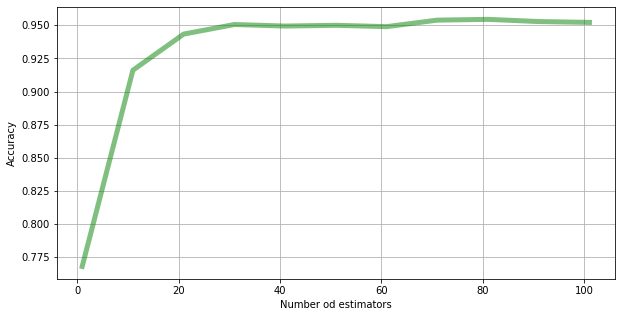

In [105]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(n_est, scores, color='green', alpha=0.5, lw=5)
ax.set_xlabel('Number od estimators')
ax.set_ylabel('Accuracy')
ax.grid(True)

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

**Answer**: YES

In [106]:
%%time
n_est = [5, 10, 15]

for ID, cur_n in enumerate(n_est):
    rf = RFC(n_estimators=cur_n)
    print('N est = {0} -> Score = {1}'.format(
        cur_n,
        np.mean(cross_val_score(rf, X, y, cv=10)))
    )


N est = 5 -> Score = 0.8888401236352825
N est = 10 -> Score = 0.9238348076248052
N est = 15 -> Score = 0.9305071366701043
Wall time: 1.13 s


3). С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

**Answer:** YES


4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

**Answer:** YES

In [90]:
%%time
n_features = [5, 10, 40, 50, 60]

for ID, cur_n in enumerate(n_features):
    rf = RFC(n_estimators=100, max_features=cur_n)
    print('N est = {0} -> Score = {1}'.format(
        cur_n,
        np.mean(cross_val_score(rf, X, y, cv=10)))
    )

N est = 5 -> Score = 0.9544556147800469
N est = 10 -> Score = 0.9532684897027194
N est = 40 -> Score = 0.9365856415767754
N est = 50 -> Score = 0.9388785600084992
N est = 60 -> Score = 0.9265843959153954
Wall time: 38.7 s


5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

**Answer:** NO

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

**Answer:** NO

In [91]:
%%time
n_depth = [5, 6, 7, 20, 50, 100]

for ID, cur_n in enumerate(n_depth):
    rf = RFC(n_estimators=100, max_depth=cur_n)
    print('N est = {0} -> Score = {1}'.format(
        cur_n,
        np.mean(cross_val_score(rf, X, y, cv=10)))
    )

N est = 5 -> Score = 0.9137190979896632
N est = 6 -> Score = 0.9276278992644842
N est = 7 -> Score = 0.9327103989162007
N est = 20 -> Score = 0.9483215565874273
N est = 50 -> Score = 0.9511372462521397
N est = 100 -> Score = 0.9533075652365735
Wall time: 19.5 s


7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

**Answer:** YES

In [107]:
corr_ans = np.array([2, 3, 4, 7])

with open('5.txt', 'w') as f:
    f.write(' '.join(corr_ans.astype(str)))